### Plotting decision boundary, margin, and margin violations (ksi)

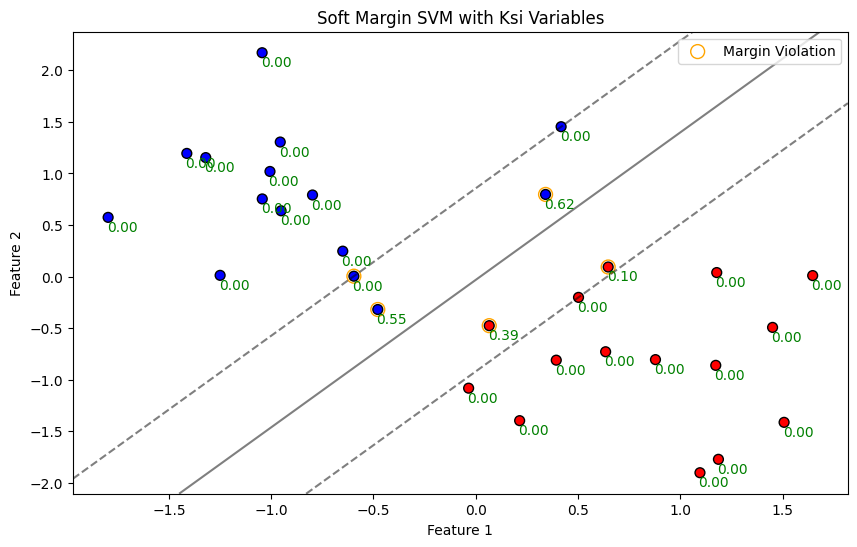

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X, y = datasets.make_blobs(n_samples=30, centers=2, random_state=42, cluster_std=3)
y = np.where(y == 0, -1, 1)  # Change labels from {0, 1} to {-1, 1}

scaler = StandardScaler()
X = scaler.fit_transform(X)

clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

w = clf.coef_[0]
b = clf.intercept_[0]

margin_distances = y * (X.dot(w) + b)
slack_variables = np.maximum(0, 1 - margin_distances)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=50)

plt.scatter(X[slack_variables > 0][:, 0], X[slack_variables > 0][:, 1], facecolors='none', edgecolor='orange', s=100, label="Margin Violation")

for i, slack in enumerate(slack_variables):
    plt.annotate(f"{slack:.2f}", (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(10, -10), ha='center', color='green')

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = (xy.dot(w) + b).reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.legend()
plt.title("Soft Margin SVM with Ksi Variables")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
